In [14]:
import json
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

In [2]:
def get_commit_compleity_data(repo_id, commit):
    commit_complexity = 0
    for antlr_file in commit['_changed_files_list']:
        commit_complexity += (antlr_file['_enter_cnt'] + antlr_file['_exit_cnt'] + antlr_file['_visit_cnt'])
    return (repo_id, commit['_commit_index'], commit['_sha_id'], commit['_timestamp'], commit_complexity)

In [3]:
with open('final_repo_data.json', "r", encoding='utf-8', errors='ignore') as infile:
    repo_info_list = []
    repo_commit_data_list = []
    json_object_list = json.load(infile, strict=False)
    for repo in json_object_list:
        repo_info_list.append((repo['_repo_id'], repo['_repo_name'], repo['_total_commits']))
        for commit in repo['_commit_history']:
            repo_commit_data_list.append(get_commit_compleity_data(repo['_repo_id'], commit))

In [4]:
repo_info_df = pd.DataFrame(repo_info_list, columns=['repo_index', 'repo_name', 'repo_total_commits'])
repo_info_df.head()

,repo_index,repo_name,repo_total_commits
0,8,Algogo,135
1,1,JSONata4Java,35
2,6,aliyun-odps-console,14
3,4,ameba,965
4,5,Alchitry-Labs,86


In [5]:
repo_complexity_df = pd.DataFrame(repo_commit_data_list, columns=['repo_index', 'commit_id', 'hash_id', 'timestamp', 'complexity'])
repo_complexity_df.head()

,repo_index,commit_id,hash_id,timestamp,complexity
0,8,1,87c097001bb0bac6f99be3b40ac2b3624c56937b,2018-06-29 15:51:07+02:00,33
1,8,135,4c3faea70c939c4546c32c0ab4977d30d0a88f8b,2019-11-23 02:03:31+01:00,34
2,1,1,06e76c1ef9d16ff06aaf4a0994fda290af6e8a9a,2019-02-09 14:28:49-05:00,0
3,1,17,049ca7604258d59cf95ae6ba6b1e555f086fa370,2019-04-18 15:30:04+00:00,0
4,1,25,2dff791b7d75dc341efe42f439cfc69f81c697d0,2019-07-18 11:43:45-04:00,0


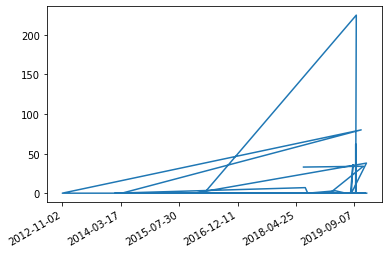

In [26]:
commit_timestamp_list = [datetime.strptime(timestamp[:-6], '%Y-%m-%d %H:%M:%S').date() for timestamp in repo_complexity_df['timestamp']]
commit_complexity_list = list(repo_complexity_df['complexity'])

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=500))
plt.plot(commit_timestamp_list, commit_complexity_list)
plt.gcf().autofmt_xdate()